In [17]:
from scipy.constants import pi 
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
import plotly.graph_objects as go

In [18]:
# Free parameters, typical setup for a HeNe laser (https://sites.astro.caltech.edu/~lah/ay105/pdf/Laser-Guide.pdf, page 8)

w_0 = 0.13 * 10**-3 # Beam waist (0.13 mm)
n = 1 # Refractive index of air
wavelength = 633 * 10**-9 # 633 nanometers (red light)
I_0 = 1 # Irradiance (W/m^2), some arbitrary value for visualization

In [19]:
z_R = pi * w_0**2 * n / wavelength # Rayleigh range

def w(z):
    return w_0 * np.sqrt(1+ np.power(z/z_R, 2))

In [20]:
# TEM Mode (l, m) Intensity Profile Function
l = 4
m = 4

# Get Hermite polynomial functions for l and m
H_l = hermite(l) 
H_m = hermite(m) 

In [21]:
def I(x, y, z):
    
    # Normalized coordinates for input into Hermite polynomials (see Wikipedia article on Hermite-Gaussian modes)
    u = np.sqrt(2) * x / w(z)
    v = np.sqrt(2) * y / w(z)

    return I_0 * ((w_0/w(z)) ** 2) * (H_l(u)**2) * (H_m(v)**2) * np.exp(-2*(x**2 + y**2)/(w(z)**2)) # Intensity profile formula, |E|^2 (imaginary phase terms cancel out and every other term is squared)

In [22]:
z = 0 # Propagation distance, 0 being start of beam waist

x = np.linspace(-3*w_0, 3*w_0, 400) # Get range of x values (-3w_0 to 3w_0)
y = np.linspace(-3*w_0, 3*w_0, 400) # Get range of y values (-3w_0 to 3w_0)
X, Y = np.meshgrid(x, y) # Create a meshgrid for 2D plotting (creates a grid of x and y values)

I_xy = I(X, Y, z) # Intensity profile at z = 0, evaluated along the meshgrid

#! Future Reference: do superposition by sum of squared electric field

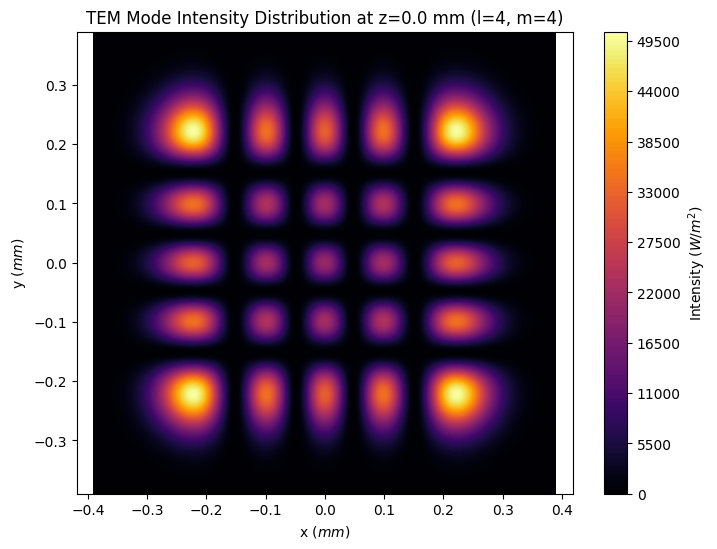

In [23]:
# Matplotlib 2D Contour Plot

plt.figure(figsize=(8, 6))
plt.contourf(X*1e3, Y*1e3, I_xy, levels=100, cmap='inferno') # Convert to mm for better visualization
plt.colorbar(label='Intensity ($W/m^2$)')
plt.title(f'TEM Mode Intensity Distribution at z={z*1e3:.1f} mm (l={l}, m={m})')
plt.xlabel('x ($mm$)')
plt.ylabel('y ($mm$)')
plt.axis('equal')
plt.show()

In [24]:
# 3D Plot using Plotly
fig = go.Figure(data=[go.Surface(z=I_xy, x=X*1e3, y=Y*1e3, colorscale='Inferno')])
fig.update_traces(colorbar_title='Intensity (W/m²)')


fig.update_layout(
    title=f'3D Plot: TEM<sub>{l},{m}</sub> Mode Intensity at z={z*1e3:.1f} mm',
    scene=dict(
        xaxis_title='x (mm)',
        yaxis_title='y (mm)',
        zaxis_title='Intensity (W/m^2)',
        aspectratio=dict(x=1, y=1, z=0.5) 
    ),
                      width=800, height=800,
)